## Lecture 13: solutions of the steady-state EBM with a = a(T) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

The solution converged.
T1* =  [232.54785439]
The solution converged.
T2* =  [265.56176712]
The solution converged.
T3* =  [286.74297742]


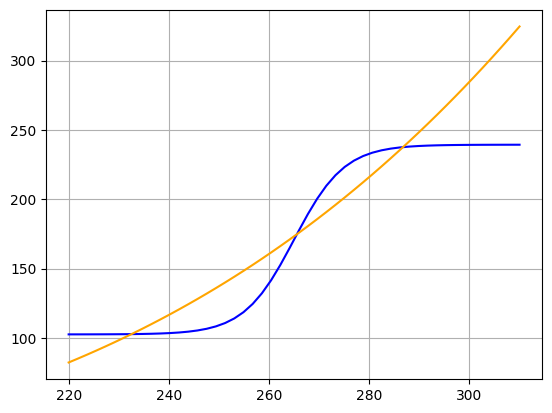

In [8]:
Q0 = 342
Q = 1*Q0
sig = 5.67e-8
gamma = 0.62
a = lambda T: 0.5 - 0.2*np.tanh(0.1*(T - 265))
ap = lambda T: -0.2*0.1/np.cosh(0.1*(T - 265))**2
f = lambda T: Q*(1 - a(T)) - sig*gamma*T**4
fp = lambda T: -Q*ap(T) - 4*sig*gamma*T**3

T = np.linspace(220, 310, 50)
plt.plot(T, Q*(1 - a(T)), color = 'blue')
plt.plot(T, sig*gamma*T**4, color = 'orange')
plt.grid(True)

sol = root(f, 220)
print(sol.message)
print("T1* = ", sol.x)

sol = root(f, 260)
print(sol.message)
print("T2* = ", sol.x)

sol = root(f, 290)
print(sol.message)
print("T3* = ", sol.x)

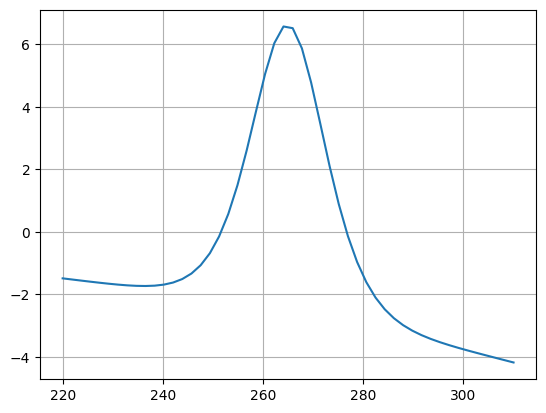

In [4]:
plt.plot(T, fp(T))
plt.grid(True)

## Bifurcations as Q changes

We want to vary Q and examine the transition of the (potentially) three states of the system

--------
Warning at Q/Q0 =  1.2657894736842106
Warning at Q/Q0 =  1.286842105263158
Warning at Q/Q0 =  1.3078947368421052
Warning at Q/Q0 =  1.3289473684210527
Warning at Q/Q0 =  1.35
--------
Warning at Q/Q0 =  1.2657894736842106
Warning at Q/Q0 =  1.286842105263158
Warning at Q/Q0 =  1.3078947368421052
Warning at Q/Q0 =  1.3289473684210527
Warning at Q/Q0 =  1.35
--------


Text(0, 0.5, 'steady state temperature')

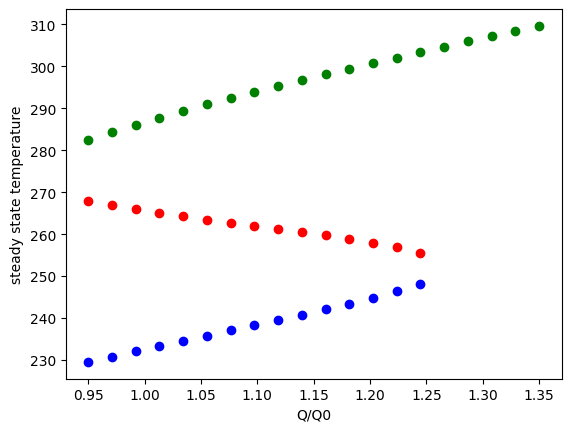

In [3]:
Q0 = 342
Qmat = Q0*np.linspace(0.95, 1.35, 20)

print("--------")
# initial guess
Tinit = 232
for i, Q in enumerate(Qmat):
    f = lambda T: Q*(1 - a(T)) - sig*gamma*T**4
    sol = root(f, Tinit)
    Tsol = sol.x
    Tinit = Tsol
    
    if sol.success == 1:
        plt.plot(Q/Q0, Tsol, 'bo')
    else:
        print("Warning at Q/Q0 = ", Q/Q0)

print("--------")
# initial guess
Tinit = 260
for i, Q in enumerate(Qmat):
    f = lambda T: Q*(1 - a(T)) - sig*gamma*T**4
    sol = root(f, Tinit)
    Tsol = sol.x
    Tinit = Tsol
    
    if sol.success == 1:
        plt.plot(Q/Q0, Tsol, 'ro')
    else:
        print("Warning at Q/Q0 = ", Q/Q0)
        

print("--------")
# initial guess
Tinit = 290
for i, Q in enumerate(Qmat):
    f = lambda T: Q*(1 - a(T)) - sig*gamma*T**4
    sol = root(f, Tinit)
    Tsol = sol.x
    Tinit = Tsol
    
    if sol.success == 1:
        plt.plot(Q/Q0, Tsol, 'go')
    else:
        print("Warning at Q/Q0 = ", Q/Q0)
    
plt.xlabel('Q/Q0')
plt.ylabel('steady state temperature')